In [1]:
%matplotlib inline

import sys, platform, os
sys.path.append('/Users/azadeh/Desktop/IR_resummation/codes/Azadeh/scripts/')
import EH_fit as EH
import sys, platform, os
from scipy.integrate import quad
from scipy.interpolate import interp1d,splev,splrep, InterpolatedUnivariateSpline
from scipy.interpolate import make_lsq_spline, BSpline
from matplotlib import pyplot as plt
from scipy.special import spherical_jn
import scipy.integrate as integrate
import numpy as np
import math

### CAMB
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
import camb
from camb import model, initialpower
print('CAMB version: %s '%camb.__version__)

plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.figsize'] = [6, 4]

plt.rcParams['text.usetex'] = True
plt.rcParams['axes.linewidth'] = 1.
plt.rcParams["axes.labelsize"] = 16
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['xtick.major.width'] = 0.8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['xtick.minor.width'] = 0.6
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['ytick.major.width'] = 0.8
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['ytick.minor.width'] = 0.6
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = 'on'
plt.rcParams['ytick.right'] = 'on'


CAMB version: 1.1.0 


# 1. Set the parmaeters of CAMB 

In [2]:
h  = 0.7
oc = 0.255 * h**2.
ob = 0.045 * h**2.
kp = 0.002/h

ç
### Compute the sigma8: note thaht the get_sigma8() function returns 
### of an array of values, in order of increasing time (decreasing redshift)
sigma8 = np.array(results.get_sigma8())     


# ka, pka       = np.loadtxt('/Users/azadeh/Desktop/IR_resummation/codes/Matteo/SplitW_NW/input/powL2000_gaussian_085_otherconvention_good.dat',unpack=True)
ka, pka       = np.loadtxt('/Volumes/Data/Documents/Git/gc-wp-nonlinear/linear_spectra_flagship/matter/high_res/flagship_linear_cb_hr_matterpower_z0p0.dat',unpack=True)
logpka        = np.log10(pka)
logka         = np.log10(ka)
logpka_interp = InterpolatedUnivariateSpline(logka,logpka,k=3)


def pk_interp(k):
    logk = np.log10(k)
    return 10.**logpka_interp(logk)
 

    

Note: redshifts have been re-sorted (earliest first)


# 2. Compute matter power spectrum

In [3]:
PK_NL = camb.get_matter_power_interpolator(pars, nonlinear=True,hubble_units=True,k_hunit=True,zmax=1100,log_interp=True,k_per_logint=True,extrap_kmax=1000)
PK_L = camb.get_matter_power_interpolator(pars, nonlinear=False,hubble_units=True,k_hunit=True,zmax=1100,log_interp=True,k_per_logint=True,extrap_kmax=1000)


# logkm  = np.linspace(-4.,3.,1000)  
# km     = 10.**logkm
# DataOut = np.column_stack((km,PK_L.P(0,km)))
# np.savetxt('lin_matter.txt',DataOut,fmt=('%8f', '%8f'))

### Get the transfer functions, kh = 1, Transfer_cdm = 2, Transfer_b = 3, Transfer_tot = 7
# trans = data.get_matter_transfer_data()
# kh    = trans.transfer_data[0,:,0]
# delta_cdm = trans.transfer_data[model.Transfer_cdm-1,:,0]
# delta_b = trans.transfer_data[model.Transfer_b-1,:,0]
# delta_tot = trans.transfer_data[model.Transfer_tot-1,:,0]

# print model.Transfer_cdm, model.Transfer_b, model.Transfer_tot
# Tcdm = delta_cdm/max(delta_cdm)
# Tb = delta_b/max(delta_b)
# Ttot = delta_tot/max(delta_tot)

# plt.loglog(kh,Tcdm/Ttot,label="cdm")
# plt.loglog(kh,Tb/Ttot,label="b")
# #plt.loglog(kh,Ttot,label="tot")
# # plt.xlim(1.e-3,1.)
# # plt.ylim(1.e-2,1.)
# plt.legend()
# plt.show()

# 3. Eisentein and Hu fit (astro-ph/9709112), load the functions from EH_fit  module

Plot the EH total matter, cdm, baryons and zero baryon transfer functions, the power spectrum and wiggle-only contribution to power spectrum

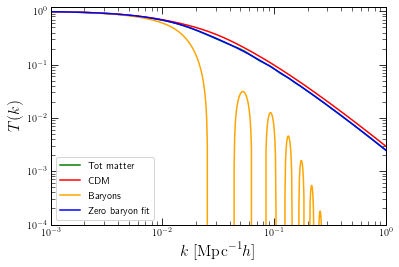

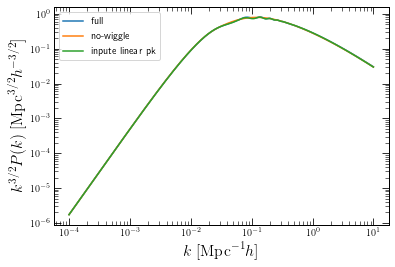

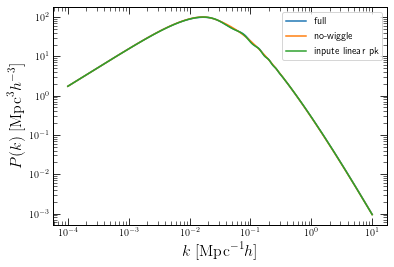

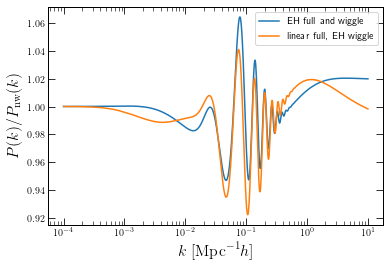

In [4]:
logks = np.linspace(-4.,1.,1000)
ks = (10.**logks)  ##ks in units of h/Mpc
kin = ks[0]
# pkin = PK_L.P(0,kin)
pkin = 10.**logpka_interp(np.log10(kin))/(2.*np.pi)**3.
pk = 10.**logpka_interp(np.log10(ks))/(2.*np.pi)**3.


plt.loglog(ks, EH.T(ks),"green", label="Tot matter")
plt.loglog(ks, EH.Tc(ks),"red", label="CDM")
plt.loglog(ks, EH.Tb(ks),"orange", label = "Baryons")
plt.loglog(ks, EH.T0(ks),"blue",label="Zero baryon fit")
plt.xlabel('$k \; [\mathrm{Mpc}^{-1} h]$')
plt.ylabel('$T(k)$')
plt.xlim(1.e-3,1.)
plt.ylim(1e-4,1.2)
plt.legend()
plt.show()

plt.loglog(ks,ks**(3./2.)*EH.EH_PS_w(ks,kin,pkin), label="full")
plt.loglog(ks,ks**(3./2.)*EH.EH_PS_nw(ks,kin,pkin),label="no-wiggle")
plt.loglog(ks,ks**(3./2.)*pk, label = "inpute linear pk")
#plt.loglog(ks,(ks)**(3./2.)*PK_L.P(0,ks), label = "inpute linear pk")
# plt.xlim(4.e-3,5)
# plt.ylim(1.,300.)
plt.xlabel('$k \; [\mathrm{Mpc}^{-1} h]$')
plt.ylabel('$k^{3/2}P(k)\; [\mathrm{Mpc}^{3/2} h^{-3/2}]$')
plt.legend()
plt.show()

plt.loglog(ks,EH.EH_PS_w(ks,kin,pkin), label="full")
plt.loglog(ks,EH.EH_PS_nw(ks,kin,pkin),label="no-wiggle")
plt.loglog(ks,pk, label = "inpute linear pk")
#plt.loglog(ks,PK_L.P(0,ks), label = "inpute linear pk")
# plt.xlim(8.e-3,4)
# plt.ylim(20.,150.)
plt.xlabel('$k \; [\mathrm{Mpc}^{-1} h]$')
plt.ylabel('$P(k)\; [\mathrm{Mpc}^3 h^{-3}]$')
plt.legend()
plt.show()

plt.semilogx(ks,EH.EH_PS_w(ks,kin,pkin)/EH.EH_PS_nw(ks,kin,pkin),label="EH full and wiggle")
plt.semilogx(ks,pk/EH.EH_PS_nw(ks,kin,pkin),label = "linear full, EH wiggle")
#plt.semilogx(ks,PK_L.P(0,ks)/EH.EH_PS_nw(ks,kin,pkin),label = "linear full, EH wiggle")
plt.xlabel('$k \; [\mathrm{Mpc}^{-1} h]$')
plt.ylabel('$P(k)/P_\mathrm{nw}(k)$')
plt.legend()
plt.show()


# Wiggle no-wiggle split using BSpline basis

Note: This method is based on performing regression to fit the full power spectrum (with wiggles) to a smooth curve. The set of basis for this regression is chosen to be Bspline basis. Zvonomir was using Mathematica's LinearModelFit() to do the regression, while I use the python make_lsq_spline(). Both functions perform the least square fit. For the mathematica function, you can provide any set of basis to use in the fit, while this python function I am using, is specifically for Bspline basis. 

1) Fit the ratio of the power spectrum to EH to a smooth curve, and plot the results for different values of Bspline degree and number of knots.

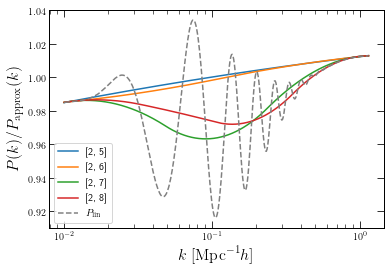

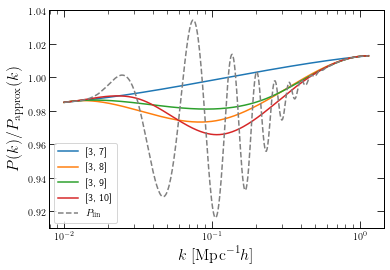

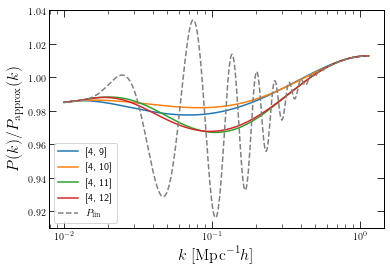

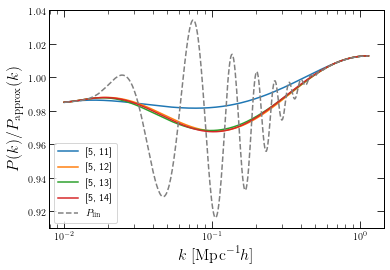

In [5]:
def pk_ratio(k,kin,pkin):
     result = pk_interp(k)/EH.EH_PS_nw(k,kin,pkin)   
#    result = PK_L.P(0,k)/EH.EH_PS_nw(k,kin,pkin)    
     return result


def logpk_nw_Bspline(logk, logpk_ratio, deg, knots):
    p = deg
    m = knots
    n = m-p-1
    knotsPrim = np.concatenate((np.zeros(p+1),np.arange(1., m-2.*p)/(m-2.*p),np.ones(p+1)), axis=None)
    minknots = np.amin(logk)
    maxknots = np.amax(logk)  
    knotsSec = (maxknots - minknots) * knotsPrim + minknots
    wdata = 1.1 + 1.e6* np.tanh(5.e-4 * (logk + 1.)**16.);
    bsfit = make_lsq_spline(logk, logpk_ratio, knotsSec, deg, wdata)
    return bsfit


# Plot the weight function to understand its shape dependence on the parameters. 
# coeff = (2.e-5,2.e-4,2.e-3,2.e-2,2.e-1)
# for x in coeff:
#     wdata = 1.1 + 1.e6* np.tanh(x * (logksp + 1.1)**16.);
#     plt.semilogx(ksp,10.**(logksp*wdata), label = '$\lambda$ = %g' %x)
# plt.ylim(0.,0.4)
# plt.legend()
# plt.show()


# Note: if you try to fit the ratio of the power spectra over 
# whole range of k, the fit would triply go wrong. You should only choose a limited range of k
# for fitting and then append the rest of kvalues. In other words, you only fit teh 
# part of the power spectrum that has the wiggles with a smooth line, 
# and stich that fit to the original power spectrum for the rest of the k-values. 

def pk_ratio_smooth_interp(k, kfmin, kfmax, deg, knots):
    kL    = k[(k < kfmin)]
    kR    = k[(k > kfmax)] 
    kf    = k[(k >= kfmin) & (k <= kfmax)]    
    logkf = np.log10(kf)    
    logpkf = np.log10(pk_ratio(kf,kfmin,pk_interp(kfmin)))
#    logpkf = np.log10(pk_ratio(kf,kfmin,PK_L.P(0,kfmin)))
    a = logpk_nw_Bspline(logkf, logpkf, deg,knots)
    b = 10.**a(logkf)
    pk_ratio_smoothL = pk_ratio(kL,kfmin,pk_interp(kfmin))
    pk_ratio_smoothR = pk_ratio(kR,kfmin,pk_interp(kfmin)) 
#     pk_ratio_smoothL = pk_ratio(kL,kfmin,PK_L.P(0,kfmin))
#     pk_ratio_smoothR = pk_ratio(kR,kfmin,PK_L.P(0,kfmin)) 
    pk_ratio_smooth  = np.concatenate((pk_ratio_smoothL, b, pk_ratio_smoothR), axis = None)     
    
    ratio_smooth_interp = InterpolatedUnivariateSpline(k, pk_ratio_smooth, k=2)       
    return ratio_smooth_interp

def pk_smooth_interp(k, kfmin, kfmax, deg, knots):
    kL     = k[(k < kfmin)]
    kR     = k[(k > kfmax)] 
    kf     = k[(k >= kfmin) & (k <= kfmax)]    
    logkf  = np.log10(kf)   
    logpkf = np.log10(pk_ratio(kf,kfmin,pk_interp(kfmin)))
#     logpkf = np.log10(pk_ratio(kf,kfmin,PK_L.P(0,kfmin)))
    a = logpk_nw_Bspline(logkf, logpkf, deg,knots)
    b = 10.**a(logkf)
    pk_ratio_smoothL = pk_ratio(kL,kfmin,pk_interp(kfmin))
    pk_ratio_smoothR = pk_ratio(kR,kfmin,pk_interp(kfmin)) 
#     pk_ratio_smoothL = pk_ratio(kL,kfmin,PK_L.P(0,kfmin))
#     pk_ratio_smoothR = pk_ratio(kR,kfmin,PK_L.P(0,kfmin)) 
    pk_ratio_smooth  = np.concatenate((pk_ratio_smoothL, b, pk_ratio_smoothR), axis = None)     
    pk_smooth = EH.EH_PS_nw(k,kfmin,pk_interp(kfmin))*pk_ratio_smooth
#    pk_smooth = EH.EH_PS_nw(k,kfmin,PK_L.P(0,kfmin))*pk_ratio_smooth
    pk_smooth_interp = InterpolatedUnivariateSpline(k, pk_smooth, k=2)       
    return pk_smooth_interp


logkk  = np.linspace(-4.,1.,1000)  
kk     = 10.**logkk
kin   = kk[0]
# pkin  = PK_L.P(0,kin)
pkin = pk_interp(kin)

logkmin_fit = -2.
logkmax_fit = 0.06
kmin_fit = 10.**logkmin_fit
kmax_fit = 10.**logkmax_fit
logk_fit = logkk[(logkk >= logkmin_fit) & (logkk <= logkmax_fit)]
kfit     = (10.**logk_fit)  
kin_fit  = kfit[0]
pkin_fit = pk_interp(kin_fit)
#pkin_fit = PK_L.P(0,kin_fit)


### Plot the no-wiggle power spectrum
# plt.loglog(kk,pk_smooth_interp(kk,kmin_fit,kmax_fit,2,5)(kk))
# plt.show()

### Plot the wiggle no-wiggle splits for different choices of Bspline degree and number of knots
def nknots(x):
    a = 2*x
    n = np.arange(a+1,a+5,1)
    return n

nknots_arr = np.arange(2,6,1)
for y in nknots_arr:
    for x in nknots(y):
        a = pk_ratio_smooth_interp(kfit, kmin_fit, kmax_fit, y, x)
        b = a(kfit)
        c = [y,x]
        plt.semilogx(kfit,b, label = c)    
    plt.semilogx(kfit,pk_ratio(kfit,kin_fit,pkin_fit),label = '$P_\mathrm{lin}$',ls="--",color='gray')
    plt.xlabel('$k \; [\mathrm{Mpc}^{-1} h]$')
    plt.ylabel('$P(k)/P_\mathrm{approx}(k)$')
    legend=plt.legend(bbox_to_anchor=(0., 1.1, 1., .105), loc=3, ncol=4, mode="expand", borderaxespad=0,  fontsize=10)
    legend.get_frame().set_edgecolor('black')
    legend.get_frame().set_linewidth(1.3)   
    plt.legend()    
    plt.show()  


## Given that for p=4 and p=5, the curves for different values of m seem to be converging better than
## for lower p values, I ll use Bspline of degree p=4.


2) Impose two constraints that the smooth curve should have the same velocity and density dispersion as the original curve

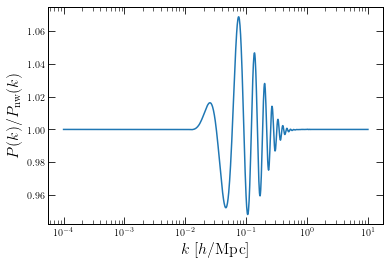

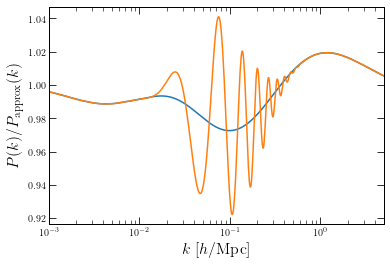

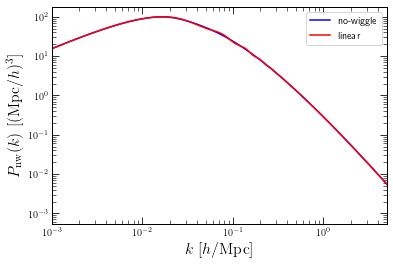

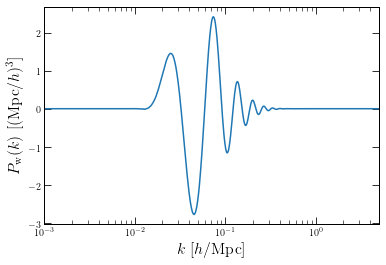

In [7]:
def wG(k,R):
    kR = k*R
    out = 3.0 * spherical_jn(1,kR)/kR
    return out
           
logkmin = -4.
logkmax = 2.
def svlin_integrand(logx):
    x = np.exp(logx)
#     return x*PK_L.P(0,x)
    return  x*pk_interp(x)

def sv_integrand(logx, deg, knot):
    x = np.exp(logx)
    a = pk_smooth_interp(kk, kmin_fit, kmax_fit, deg, knot)(x)
    return x*a

def integ_sv(deg, knot):
    out = integrate.quad(sv_integrand,logkmin,logkmax, args=(deg,knot),epsrel = 1.e-3,limit=1000)
#    sv = 1./(6.*np.pi**2.)*out[0]
    sv = 4.*np.pi/3.*out[0]
    return sv

def s8lin_integrand(logx):
    x = np.exp(logx)
#     return  x**3.*wG(x,8)**2.*PK_L.P(0,x)
#     return  x**3.*wG(x,8)**2.*pk_interp(x)
    return  x**3.*wG(x,8)**2.*pk_interp(x)

def s8_integrand(logx, deg, knot):
    x = np.exp(logx)
    a = pk_smooth_interp(kk, kmin_fit, kmax_fit, deg, knot)(x)
    return x**3.*wG(x,8)**2.*a

def integ_s8(deg, knot):
    out = integrate.quad(s8_integrand,logkmin,logkmax, args=(deg,knot),epsrel = 1.e-3,limit=1000)
#     s8 = 1./(2.*np.pi**2.)*out[0]
    s8 = 4.*np.pi*out[0]
    return s8

#kss = np.linspace(0.01,10.,150)
# def svlin(ks): 
#     f = np.sqrt(1./(6.*np.pi**2.)*integrate.quad(svlin_integrand,np.log(1.e-5),np.log(ks),epsrel = 1.e-3,limit=1000)[0])
#     return f
# vsvlin = np.vectorize(svlin)
# plt.semilogx(kss,vsvlin(kss))
# plt.xlabel('$k_s \; [h/\mathrm{Mpc}]$')
# plt.ylabel('$\sigma_v(k_s)$')
# plt.savefig("sigv.png")
# plt.show()

def pk_smooth_ave(k, deg, knots):   
    integ_svlin = integrate.quad(svlin_integrand,logkmin,logkmax,epsrel = 1.e-3,limit=1000)
    integ_s8lin = integrate.quad(s8lin_integrand,logkmin,logkmax,epsrel = 1.e-3,limit=1000)
#     svlin = 1./(6.*np.pi**2.)*integ_svlin[0]
#     s8lin = 1./(2.*np.pi**2.)*integ_s8lin[0]
    svlin = 4.*np.pi/3.*integ_svlin[0]
    s8lin = 4.*np.pi*integ_s8lin[0]
    
    s8_vec = []
    sv_vec = [] 
    for x in knots:
        s8_vec = np.append(s8_vec, integ_s8(deg,x))
        sv_vec = np.append(sv_vec, integ_sv(deg,x))
        
    rhs = np.array([1., s8lin, svlin])    
    lhs = np.array([np.ones(3), s8_vec, sv_vec])
    res = np.linalg.solve(lhs, rhs)

    i = 0
    pk_smooth = 0.
    for x in knots:
        pk_smooth += res[i]*pk_smooth_interp(kk, kmin_fit, kmax_fit, deg, x)(k)
        i += 1   
    return pk_smooth    

deg1   = 4
knots1 = np.arange(9,12,1) 

# plt.semilogx(kk,PK_L.P(0,kk)/pk_smooth_ave(kk,deg1,knots1),label ='average')  
plt.semilogx(kk,pk_interp(kk)/pk_smooth_ave(kk,deg1,knots1),label ='average')  
plt.xlabel('$k \; [h/\mathrm{Mpc}]$')
plt.ylabel('$P(k)/P_\mathrm{nw}(k)$')
plt.savefig("sims_linnw_ratio.png")
plt.show()        

plt.semilogx(kk,pk_smooth_ave(kk,deg1,knots1)/EH.EH_PS_nw(kk,kin,pkin),label ='average')  
plt.semilogx(kk,pk_ratio(kk,kin,pkin),label = '$P_\mathrm{lin}$')
plt.xlabel('$k \; [h/\mathrm{Mpc}]$')
plt.ylabel('$P(k)/P_\mathrm{approx}(k)$')
plt.xlim([1.e-3,5.])
plt.savefig("sims_nwEH_ratio.png")
plt.show() 

p_nw = pk_smooth_ave(kk,deg1,knots1)
# plin = PK_L.P(0,kk)
plin = pk_interp(kk)
p_w  = plin - p_nw

plt.loglog(kk,p_nw,'b', label="no-wiggle")
plt.loglog(kk,plin,'r', label="linear")
plt.xlabel('$k \; [h/\mathrm{Mpc}]$')
plt.ylabel('$P_\mathrm{nw}(k) \ [(\mathrm{Mpc}/h)^3]$')
plt.xlim([1.e-3,5.])
plt.savefig("sims_lin_nw.png")
plt.legend()
plt.show() 

plt.semilogx(kk,p_w)
plt.xlabel('$k \; [h/\mathrm{Mpc}]$')
plt.ylabel('$P_\mathrm{w}(k) \ [(\mathrm{Mpc}/h)^3]$')
plt.xlim([1.e-3,5.])
plt.savefig("sims_lin_w.png")
plt.show()
 
# DataOut = np.column_stack((kk,p_w,p_nw))
# np.savetxt('pk_Bspline.txt',DataOut,fmt=('%8f', '%8f', '%8f'))
